## 5.4.3 4スピン系の基底状態

### Marshall-Lieb-Mattisの定理

$S_{tot}^{z}$の固有値$M=0$の部分空間での基底状態は、図5.12のような連結2部グラフ$G=(V,E)$を考えると、(サイト1,3は$A$に属する)

$$
\begin{aligned}
|\psi ⟩=\sum_{\tilde{\sigma}=0} \sigma_1 \sigma_3 \psi(\sigma_1,\sigma_2,\sigma_3,\sigma_4) |\sigma_1,\sigma_2,\sigma_3,\sigma_4 ⟩
\end{aligned}
$$

となる。ただし、

$$
\begin{aligned}
\tilde{\sigma}=\sum_{i \in V} \sigma_{i}
\end{aligned}
$$

とする。

4.2.1節のBoltzmannマシンの式から、確率振幅は

$$
\begin{aligned}
\psi(\sigma_1,\sigma_2,\sigma_3,\sigma_4)=A \cosh{W(\sigma_1-\sigma_2+\sigma_3-\sigma_4)}
\end{aligned}
$$

というモデルを仮定する。符号因子$\sigma_1 \sigma_3$と$\psi ( \geqq 0)$に分けることで、パラメータ$W$を実数にとれる。

#### 基底エネルギー

エネルギー期待値は、式(5-43)になる。$t=\cosh{4W}$とおくと、$\epsilon_0$を$W$で微分する。

$$
\begin{aligned}
\frac{d \epsilon_0}{dW}=\frac{d t}{dW} \frac{d \epsilon_0}{dt}=0
\end{aligned}
$$


とすると、$\frac{d t}{dW}=0$のときは$W=0$になり、不適。

<!-- $$
\begin{aligned}
\end{aligned}
$$ -->

$$
\begin{aligned}
\epsilon_0=-J \frac{2t^2-8t}{2t^2+4}
\end{aligned}
$$

$$
\begin{aligned}
\frac{d \epsilon_0}{dt}=-J \frac{(2t+4)(t^2+2)-2t(t^2+4t)}{(t^2+2)^2}&=0 \\
t^2-t-2&=0 \\
(t-2)(t+1)&=0 \\
\therefore t=2
\end{aligned}
$$

となる。これを$W$について解けば、

$$
\begin{aligned}
\cosh{4W}&=2 \\
(e^{4W})^2-4e^{4W}+1&=0 \\
e^{4W}&=2 \pm \sqrt{3} \\
\therefore W &=\frac{1}{4} \log({2 \pm \sqrt{3})}
\end{aligned}
$$

また、$t=2$のとき、$\epsilon_0=-2J$が確かめられる。

#### 基底状態

$\tilde{\sigma}=0$となる状態は、$_4 C_2=6$通りある。このうち、$A$に属するサイト1,3が同符号となる場合が2、異符号が4通りある。式(5-42)より、前者だと$\psi$は$A \cosh{4W}$で、後者だと$-A$である。基底状態を考えると、上の計算より$\cosh{4W}=2$が成り立つので、符号因子$\sigma_1 \sigma_3$も考慮して、式(5-45)のようになる。

#### 数値的に検証 （以下では$J=1$とする）

In [3]:
import netket as nk

In [4]:
import json 
import numpy as np
import matplotlib.pyplot as plt
import time

In [6]:
#格子とハミルトニアンの導入
L=4 #サイト数
g=nk.graph.Hypercube(length=L,n_dim=1,pbc=True) #グラフの定義
hi=nk.hilbert.Spin(s=0.5,total_sz=0,N=g.n_nodes) #ヒルベルト空間
ha=nk.operator.Heisenberg(hilbert=hi,graph=g)*0.25

NetKetのハイゼンベルク模型チュートリアル: https://netket.readthedocs.io/en/latest/tutorials/gs-heisenberg.html

In [9]:
ha.to_dense()

array([[ 0. , -0.5,  0. ,  0. , -0.5,  0. ],
       [-0.5, -1. , -0.5, -0.5,  0. , -0.5],
       [ 0. , -0.5,  0. ,  0. , -0.5,  0. ],
       [ 0. , -0.5,  0. ,  0. , -0.5,  0. ],
       [-0.5,  0. , -0.5, -0.5, -1. , -0.5],
       [ 0. , -0.5,  0. ,  0. , -0.5,  0. ]])

ハミルトニアンの方で符号因子が考慮されているため、非対角要素が0以下になっている。(?)

In [10]:
ma=nk.models.RBM(alpha=1/4) #alphaは可視ニューロンに対する隠れニューロンの割合

In [12]:
sa=nk.sampler.MetropolisExchange(hilbert=hi,graph=g)

In [13]:
op=nk.optimizer.Sgd(learning_rate=0.05)
sr=nk.optimizer.SR(diag_shift=0.1)

In [14]:
vs=nk.vqs.MCState(sa,ma,n_samples=1000)

/usr/local/lib/python3.10/dist-packages/netket/vqs/mc/mc_state/state.py:58: UserWarning: n_samples=1000 (1000 per MPI rank) does not divide n_chains=16, increased to 1008 (1008 per MPI rank)
  warnings.warn(


In [16]:
gs=nk.VMC(
    hamiltonian=ha,
    optimizer=op,
    preconditioner=sr,
    variational_state=vs
)

In [17]:
start=time.time()
gs.run(out='RBM',n_iter=200)
end=time.time()

100%|██████████| 200/200 [00:02<00:00, 70.12it/s, Energy=-2.000e+00 ± 2.140e-12 [σ²=4.616e-21, R̂=1.0075]]


エネルギーは解析的な結果と一致したが、変分パラメータは？

In [19]:
print(vs.variables["params"]["visible_bias"]) #a_i
print(vs.variables["params"]["Dense"]["bias"]) #b
print(vs.variables["params"]["Dense"]["kernel"]) #W_j

[0.00320388 0.00141645 0.00320386 0.00141639]
[-0.00412793]
[[ 0.32318392]
 [-0.33529293]
 [ 0.32318033]
 [-0.33530809]]


解析的に求めた変分パラメータ$W$の値と非常に近い。$a_i$や$b$はほぼゼロ。

##5.4.4 より大きな系の基底状態

In [20]:
#格子とハミルトニアンの導入
L=20 #サイト数
g=nk.graph.Hypercube(length=L,n_dim=1,pbc=True) #グラフの定義
hi=nk.hilbert.Spin(s=0.5,total_sz=0,N=g.n_nodes) #ヒルベルト空間
ha=nk.operator.Heisenberg(hilbert=hi,graph=g)*0.25

In [21]:
ha.to_dense()

array([[ 4. , -0.5,  0. , ...,  0. ,  0. ,  0. ],
       [-0.5,  3. , -0.5, ...,  0. ,  0. ,  0. ],
       [ 0. , -0.5,  3. , ...,  0. ,  0. ,  0. ],
       ...,
       [ 0. ,  0. ,  0. , ...,  3. , -0.5,  0. ],
       [ 0. ,  0. ,  0. , ..., -0.5,  3. , -0.5],
       [ 0. ,  0. ,  0. , ...,  0. , -0.5,  4. ]])

In [22]:
ma=nk.models.RBM(alpha=1) #alphaは可視ニューロンに対する隠れニューロンの割合

In [23]:
sa=nk.sampler.MetropolisExchange(hilbert=hi,graph=g)

In [24]:
op=nk.optimizer.Sgd(learning_rate=0.05)
sr=nk.optimizer.SR(diag_shift=0.1)

In [25]:
vs=nk.vqs.MCState(sa,ma,n_samples=1000)

/usr/local/lib/python3.10/dist-packages/netket/vqs/mc/mc_state/state.py:58: UserWarning: n_samples=1000 (1000 per MPI rank) does not divide n_chains=16, increased to 1008 (1008 per MPI rank)
  warnings.warn(


In [26]:
gs=nk.VMC(
    hamiltonian=ha,
    optimizer=op,
    preconditioner=sr,
    variational_state=vs
)

In [27]:
# 01:42
start=time.time()
gs.run(out='RBM',n_iter=1000)
end=time.time()

100%|██████████| 1000/1000 [01:42<00:00,  9.79it/s, Energy=-8.9038 ± 0.0034 [σ²=0.0114, R̂=1.0027]]


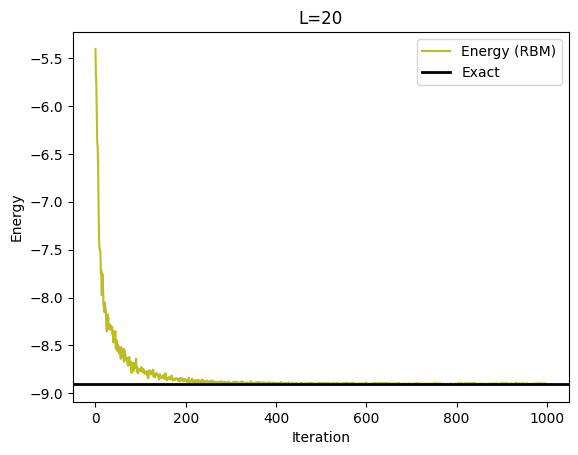

In [42]:
from netket.vqs import exact
# import the data from log file
data_RBM=json.load(open("RBM.log"))
   
iters_RBM = data_RBM["Energy"]["iters"]
energy_RBM = data_RBM["Energy"]["Mean"]

exact_gs_energy=-8.90
fig, ax1 = plt.subplots()
ax1.plot(iters_RBM, energy_RBM, color='C8', label='Energy (RBM)')
ax1.set_ylabel('Energy')
ax1.set_xlabel('Iteration')
# plt.axis([0,iters_RBM[-1],exact_gs_energy-0.1,exact_gs_energy+0.4])
plt.axhline(y=exact_gs_energy, xmin=0,xmax=iters_RBM[-1], linewidth=2, color='k', label='Exact')

plt.title("L=20")
ax1.legend()
plt.show()

In [43]:
#並進対称性を考えると、パラメータ数を減らせる!
ma=nk.models.RBMSymm(symmetries=g.translation_group(),alpha=1)

In [44]:
sa=nk.sampler.MetropolisExchange(hilbert=hi,graph=g)

In [45]:
op=nk.optimizer.Sgd(learning_rate=0.05)
sr=nk.optimizer.SR(diag_shift=0.1)

In [46]:
vs=nk.vqs.MCState(sa,ma,n_samples=1000)

/usr/local/lib/python3.10/dist-packages/netket/vqs/mc/mc_state/state.py:58: UserWarning: n_samples=1000 (1000 per MPI rank) does not divide n_chains=16, increased to 1008 (1008 per MPI rank)
  warnings.warn(


In [47]:
gs=nk.VMC(
    hamiltonian=ha,
    optimizer=op,
    preconditioner=sr,
    variational_state=vs
)

In [48]:
# 01:28
start=time.time()
gs.run(out='RBMSymm',n_iter=1000)
end=time.time()

100%|██████████| 1000/1000 [01:28<00:00, 11.26it/s, Energy=-8.9012 ± 0.0023 [σ²=0.0053, R̂=1.0130]]
